In [ ]:
# Formula 1 Exploratory Data Analysis
# Author: Jorge Luis Mateos Reyes
# Date: 27/03/2025

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set visualization styles
plt.style.use('fivethirtyeight')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]

# Display settings for better notebook readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)


Recolección de datos

In [ ]:
# Function to fetch data from Ergast API
def fetch_ergast_data(endpoint):
    base_url = "http://ergast.com/api/f1"
    full_url = f"{base_url}/{endpoint}.json?limit=1000"
    response = requests.get(full_url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

# Define the seasons we want to analyze
current_year = datetime.now().year
seasons_to_analyze = list(range(current_year-10, current_year+1))  # Last 10 seasons

# Collect race results data
print("Collecting race results data...")
race_results_data = []

for year in seasons_to_analyze:
    print(f"Fetching {year} season data...")
    data = fetch_ergast_data(f"{year}/results")
    if data:
        races = data['MRData']['RaceTable']['Races']
        for race in races:
            race_name = race['raceName']
            circuit = race['Circuit']['circuitName']
            date = race['date']

            for result in race['Results']:
                driver = f"{result['Driver']['givenName']} {result['Driver']['familyName']}"
                driver_id = result['Driver']['driverId']
                constructor = result['Constructor']['name']
                position = result['position']
                grid = result['grid']
                status = result['status']
                points = result.get('points', 0)

                # Get fastest lap if available
                fastest_lap = None
                if 'FastestLap' in result:
                    fastest_lap = result['FastestLap']['rank']

                race_results_data.append({
                    'season': year,
                    'race_name': race_name,
                    'circuit': circuit,
                    'date': date,
                    'driver': driver,
                    'driver_id': driver_id,
                    'constructor': constructor,
                    'position': int(position) if position.isdigit() else None,
                    'grid': int(grid) if grid.isdigit() else None,
                    'status': status,
                    'points': float(points),
                    'fastest_lap': fastest_lap
                })

# Create DataFrame for race results
race_results_df = pd.DataFrame(race_results_data)

Fetching 2015 season data...
Fetching 2016 season data...
Fetching 2017 season data...
Fetching 2018 season data...
Fetching 2019 season data...
Fetching 2020 season data...
Fetching 2021 season data...
Fetching 2022 season data...
Fetching 2023 season data...
Fetching 2024 season data...
Fetching 2025 season data...


In [ ]:
# Collect qualifying data
print("Collecting qualifying data...")
qualifying_data = []

for year in seasons_to_analyze:
    print(f"Fetching {year} qualifying data...")
    data = fetch_ergast_data(f"{year}/qualifying")
    if data:
        races = data['MRData']['RaceTable']['Races']
        for race in races:
            race_name = race['raceName']
            circuit = race['Circuit']['circuitName']
            date = race['date']

            for result in race['QualifyingResults']:
                driver = f"{result['Driver']['givenName']} {result['Driver']['familyName']}"
                driver_id = result['Driver']['driverId']
                constructor = result['Constructor']['name']
                position = result['position']

                # Get Q1, Q2, Q3 times if available
                q1_time = result.get('Q1', None)
                q2_time = result.get('Q2', None)
                q3_time = result.get('Q3', None)

                qualifying_data.append({
                    'season': year,
                    'race_name': race_name,
                    'circuit': circuit,
                    'date': date,
                    'driver': driver,
                    'driver_id': driver_id,
                    'constructor': constructor,
                    'position': int(position) if position.isdigit() else None,
                    'q1_time': q1_time,
                    'q2_time': q2_time,
                    'q3_time': q3_time
                })

# Create DataFrame for qualifying
qualifying_df = pd.DataFrame(qualifying_data)

Fetching 2015 qualifying data...
Fetching 2016 qualifying data...
Fetching 2017 qualifying data...
Fetching 2018 qualifying data...
Fetching 2019 qualifying data...
Fetching 2020 qualifying data...
Fetching 2021 qualifying data...
Fetching 2022 qualifying data...
Fetching 2023 qualifying data...
Fetching 2024 qualifying data...
Fetching 2025 qualifying data...


In [ ]:
# Collect driver standings data
print("Collecting driver standings data...")
driver_standings_data = []

for year in seasons_to_analyze:
    print(f"Fetching {year} driver standings...")
    data = fetch_ergast_data(f"{year}/driverStandings")
    if data:
        standings_lists = data['MRData']['StandingsTable']['StandingsLists']
        for standings in standings_lists:
            round_num = standings['round']
            for standing in standings['DriverStandings']:
                driver = f"{standing['Driver']['givenName']} {standing['Driver']['familyName']}"
                driver_id = standing['Driver']['driverId']
                position = standing['position']
                points = standing['points']
                wins = standing['wins']

                driver_standings_data.append({
                    'season': year,
                    'round': int(round_num),
                    'driver': driver,
                    'driver_id': driver_id,
                    'position': int(position) if position.isdigit() else None,
                    'points': float(points),
                    'wins': int(wins)
                })

# Create DataFrame for driver standings
driver_standings_df = pd.DataFrame(driver_standings_data)

Fetching 2015 driver standings...
Fetching 2016 driver standings...
Fetching 2017 driver standings...
Fetching 2018 driver standings...
Fetching 2019 driver standings...
Fetching 2020 driver standings...
Fetching 2021 driver standings...
Fetching 2022 driver standings...
Fetching 2023 driver standings...
Fetching 2024 driver standings...
Fetching 2025 driver standings...


In [ ]:
# Collect constructor standings data
print("Collecting constructor standings data...")
constructor_standings_data = []

for year in seasons_to_analyze:
    print(f"Fetching {year} constructor standings...")
    data = fetch_ergast_data(f"{year}/constructorStandings")
    if data:
        standings_lists = data['MRData']['StandingsTable']['StandingsLists']
        for standings in standings_lists:
            round_num = standings['round']
            for standing in standings['ConstructorStandings']:
                constructor = standing['Constructor']['name']
                constructor_id = standing['Constructor']['constructorId']
                position = standing['position']
                points = standing['points']
                wins = standing['wins']

                constructor_standings_data.append({
                    'season': year,
                    'round': int(round_num),
                    'constructor': constructor,
                    'constructor_id': constructor_id,
                    'position': int(position) if position.isdigit() else None,
                    'points': float(points),
                    'wins': int(wins)
                })

# Create DataFrame for constructor standings
constructor_standings_df = pd.DataFrame(constructor_standings_data)

Fetching 2015 constructor standings...
Fetching 2016 constructor standings...
Fetching 2017 constructor standings...
Fetching 2018 constructor standings...
Fetching 2019 constructor standings...
Fetching 2020 constructor standings...
Fetching 2021 constructor standings...
Fetching 2022 constructor standings...
Fetching 2023 constructor standings...
Fetching 2024 constructor standings...
Fetching 2025 constructor standings...


In [ ]:
# Save the collected data to CSV files for future use
race_results_df.to_csv('f1_race_results.csv', index=False)
qualifying_df.to_csv('f1_qualifying.csv', index=False)
driver_standings_df.to_csv('f1_driver_standings.csv', index=False)
constructor_standings_df.to_csv('f1_constructor_standings.csv', index=False)

print("Data collection complete!")

Data collection complete!


Preparación y Limpieza de datos

In [ ]:
# Convert date columns to datetime
race_results_df['date'] = pd.to_datetime(race_results_df['date'])
qualifying_df['date'] = pd.to_datetime(qualifying_df['date'])

# Calculate positions gained/lost during race
race_results_df['positions_gained'] = race_results_df['grid'] - race_results_df['position']
race_results_df['positions_gained'] = race_results_df['positions_gained'].fillna(0)

# Create a flag for DNF (Did Not Finish)
race_results_df['dnf'] = race_results_df['status'].apply(lambda x: 0 if x == 'Finished' else 1)

# Create a flag for podium finishes
race_results_df['podium'] = race_results_df['position'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

# Create a flag for points finishes (top 10)
race_results_df['points_finish'] = race_results_df['position'].apply(lambda x: 1 if x is not None and x <= 10 else 0)

Analisis por Pilotos

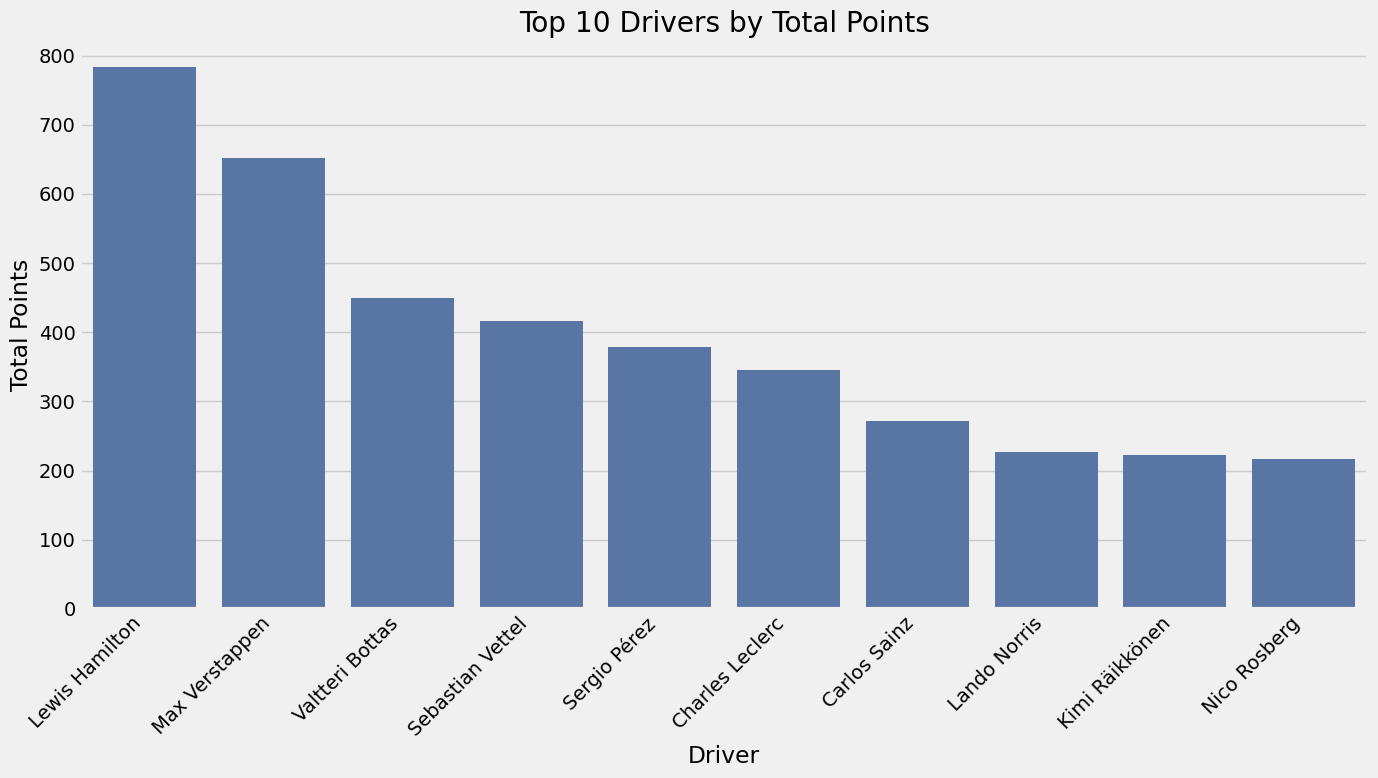

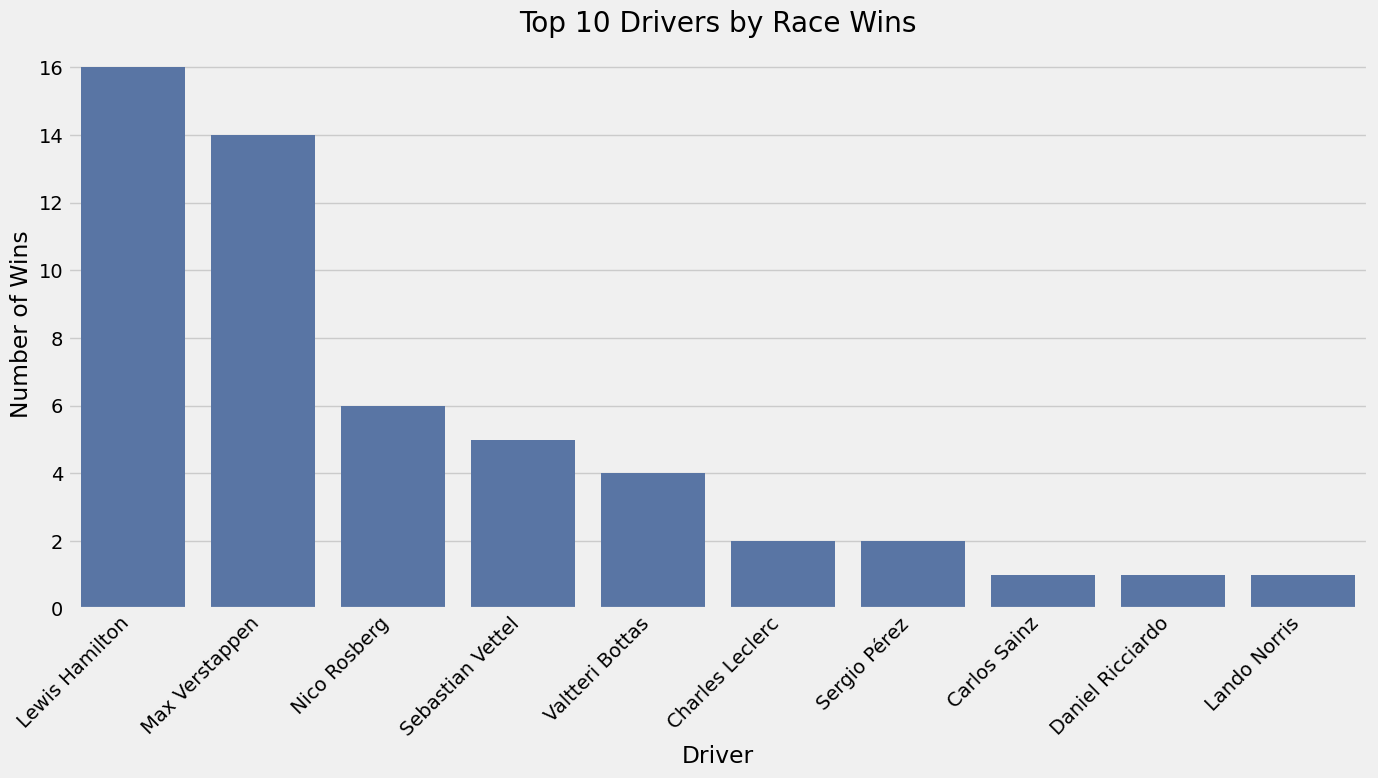

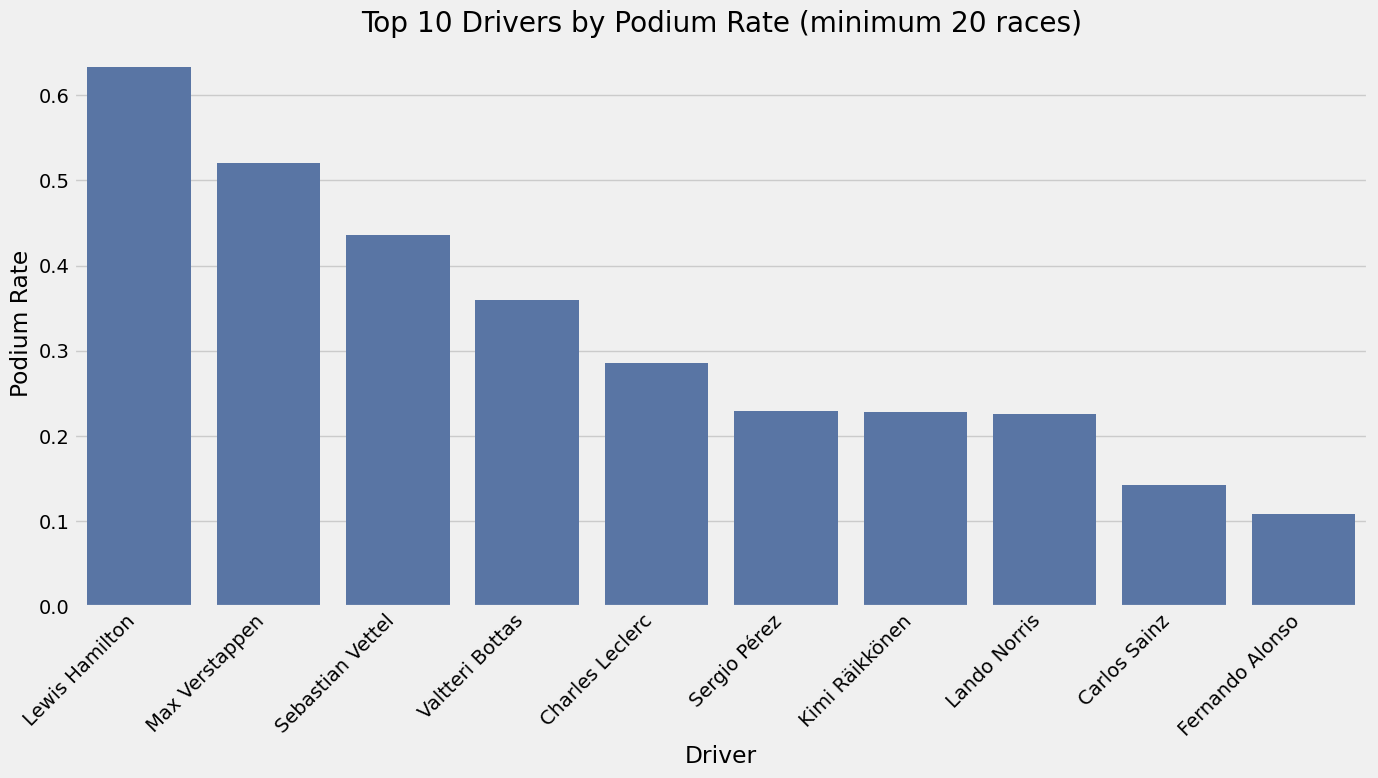

In [ ]:
# Top drivers by total points
driver_points = race_results_df.groupby('driver')['points'].sum().sort_values(ascending=False)
top_drivers = driver_points.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_drivers.index, y=top_drivers.values)
plt.title('Top 10 Drivers by Total Points')
plt.xlabel('Driver')
plt.ylabel('Total Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Win count by driver
driver_wins = race_results_df[race_results_df['position'] == 1].groupby('driver').size().sort_values(ascending=False)
top_winners = driver_wins.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_winners.index, y=top_winners.values)
plt.title('Top 10 Drivers by Race Wins')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Podium rate by driver (minimum 20 races)
driver_races = race_results_df.groupby('driver').size()
qualified_drivers = driver_races[driver_races >= 20].index
driver_podiums = race_results_df[race_results_df['driver'].isin(qualified_drivers)].groupby('driver')['podium'].mean().sort_values(ascending=False)
top_podium_rate = driver_podiums.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_podium_rate.index, y=top_podium_rate.values)
plt.title('Top 10 Drivers by Podium Rate (minimum 20 races)')
plt.xlabel('Driver')
plt.ylabel('Podium Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analisis por Constructores/Equipos

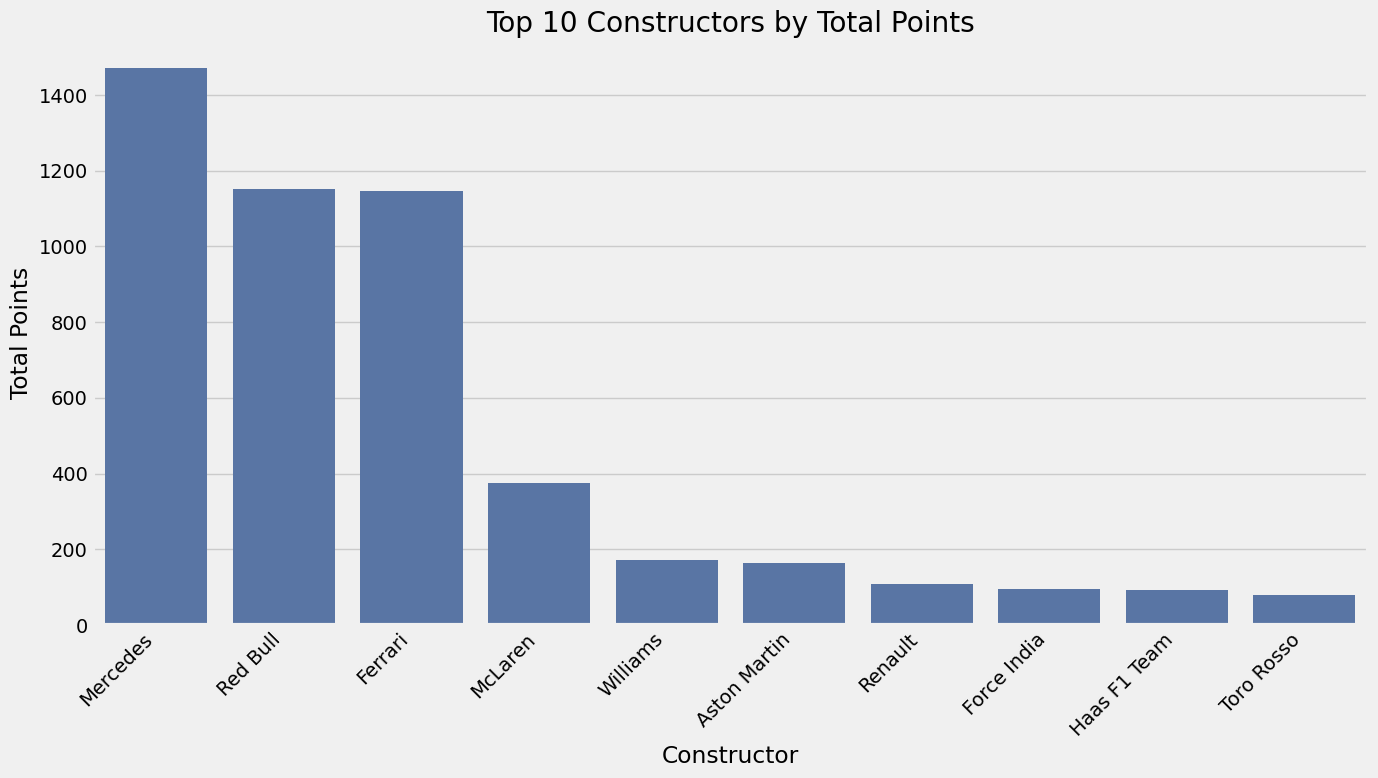

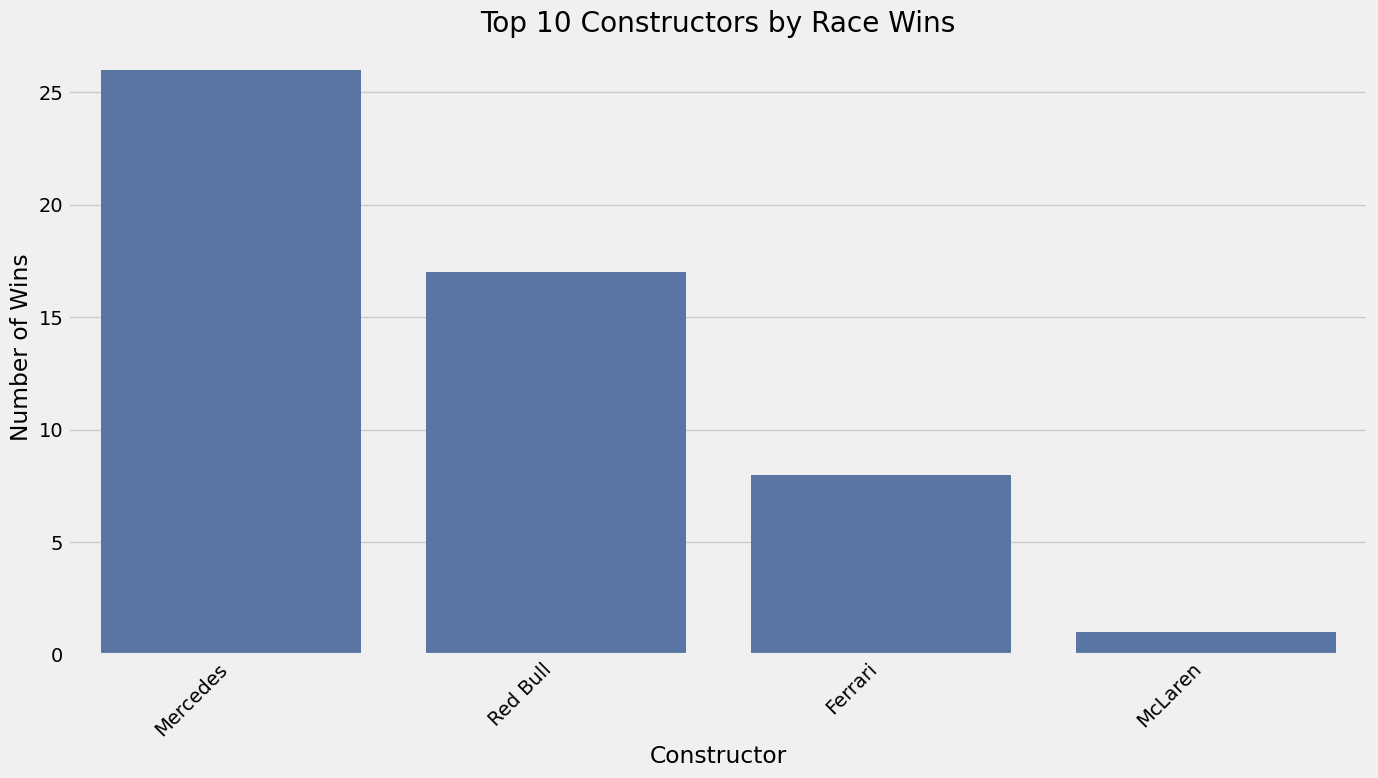

In [ ]:
# Top constructors by total points
constructor_points = race_results_df.groupby('constructor')['points'].sum().sort_values(ascending=False)
top_constructors = constructor_points.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_constructors.index, y=top_constructors.values)
plt.title('Top 10 Constructors by Total Points')
plt.xlabel('Constructor')
plt.ylabel('Total Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Win count by constructor
constructor_wins = race_results_df[race_results_df['position'] == 1].groupby('constructor').size().sort_values(ascending=False)
top_constructor_winners = constructor_wins.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_constructor_winners.index, y=top_constructor_winners.values)
plt.title('Top 10 Constructors by Race Wins')
plt.xlabel('Constructor')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analisis de Circuitos

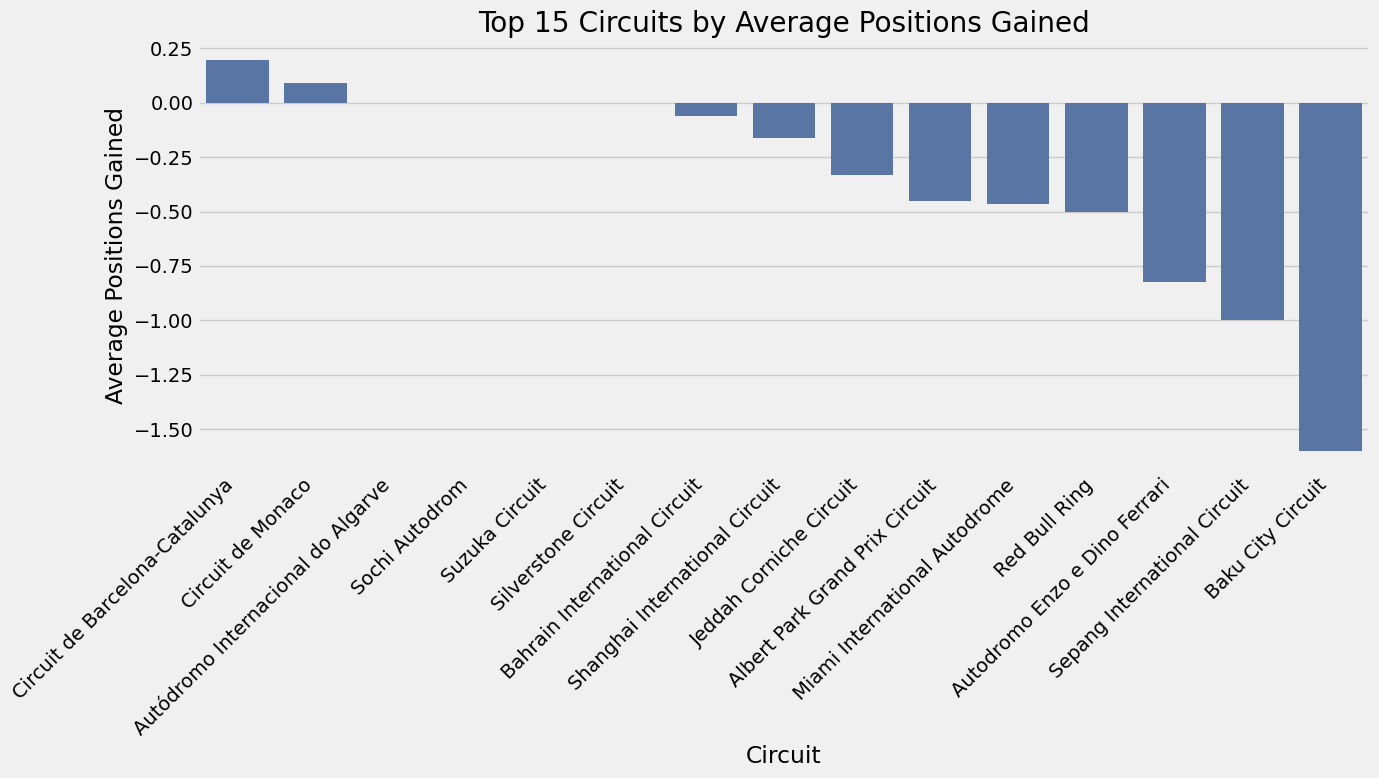

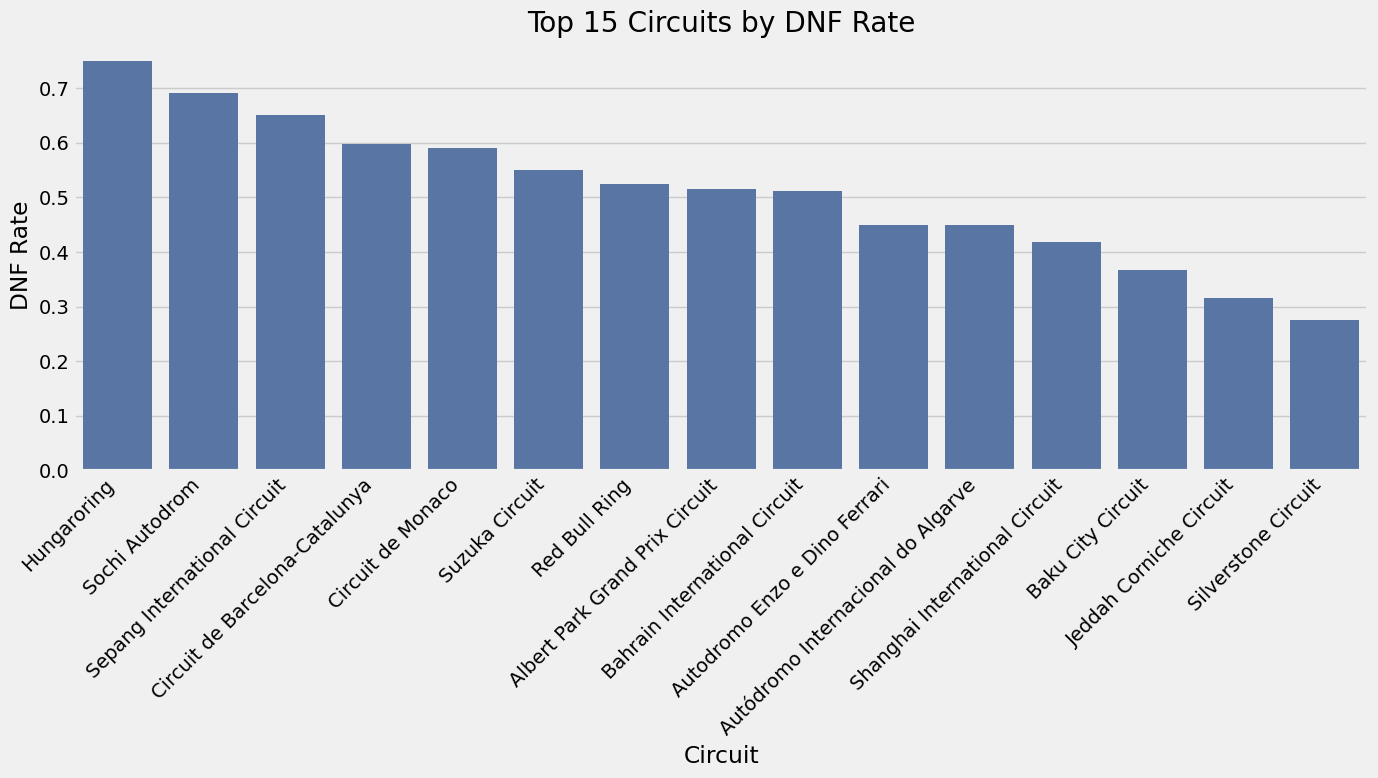

In [ ]:
# Overtaking opportunities by circuit
circuit_overtaking = race_results_df.groupby('circuit')['positions_gained'].mean().sort_values(ascending=False)
top_overtaking_circuits = circuit_overtaking.head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_overtaking_circuits.index, y=top_overtaking_circuits.values)
plt.title('Top 15 Circuits by Average Positions Gained')
plt.xlabel('Circuit')
plt.ylabel('Average Positions Gained')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# DNF rate by circuit
circuit_dnf = race_results_df.groupby('circuit')['dnf'].mean().sort_values(ascending=False)
top_dnf_circuits = circuit_dnf.head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_dnf_circuits.index, y=top_dnf_circuits.values)
plt.title('Top 15 Circuits by DNF Rate')
plt.xlabel('Circuit')
plt.ylabel('DNF Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analisis de luchas por el campeonato

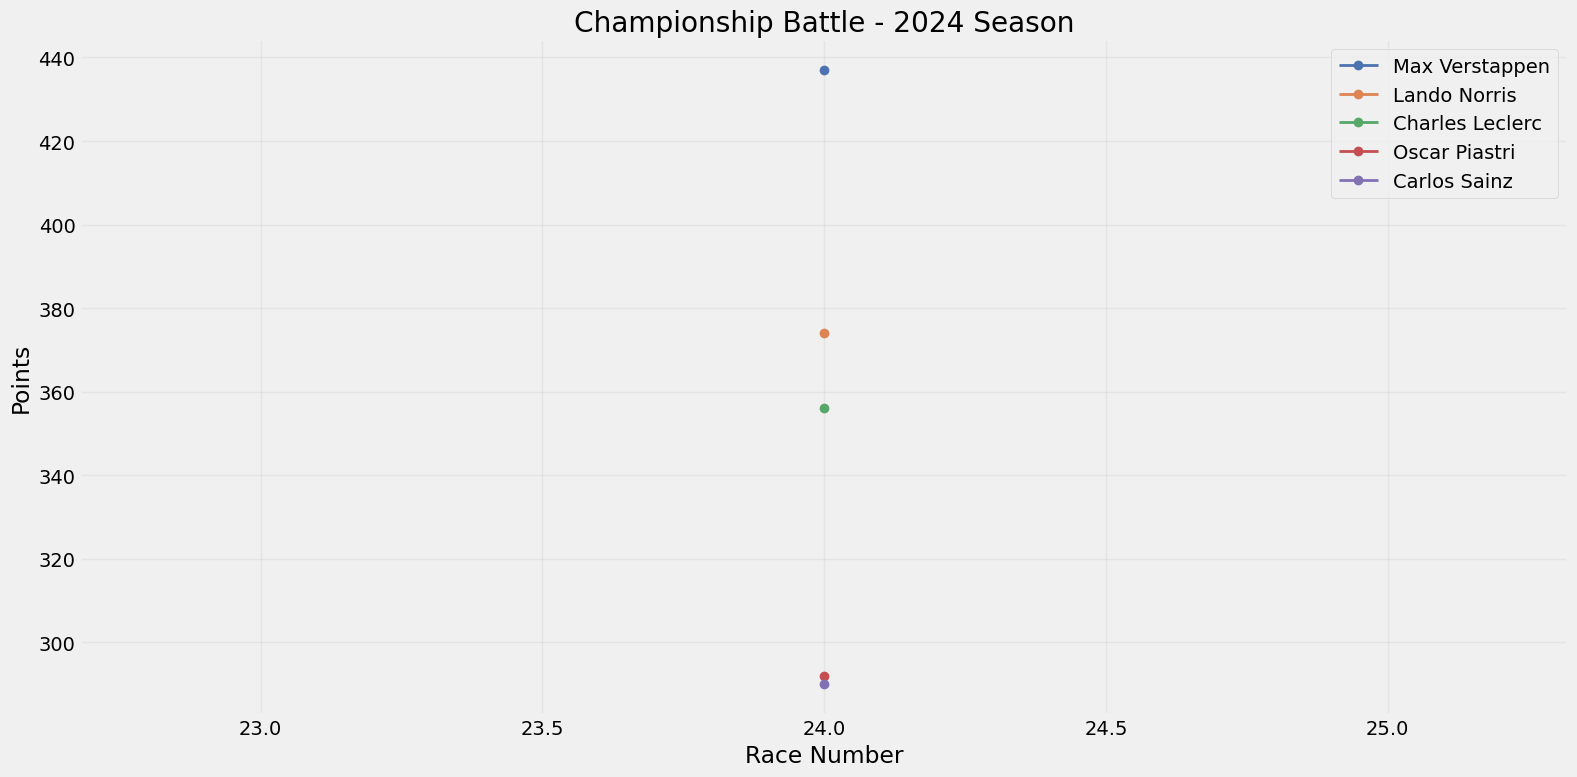

In [ ]:
# Get the most recent completed season
latest_season = max(driver_standings_df['season'])

# Filter for the latest season's championship battle
latest_championship = driver_standings_df[driver_standings_df['season'] == latest_season]

# Get top 5 drivers from the final standings
final_round = latest_championship['round'].max()
final_standings = latest_championship[latest_championship['round'] == final_round]
top5_drivers = final_standings.sort_values('position').head(5)['driver_id'].tolist()

# Filter championship data for these drivers
top5_championship = latest_championship[latest_championship['driver_id'].isin(top5_drivers)]

# Create a line plot showing points progression
plt.figure(figsize=(16, 8))
for driver in top5_drivers:
    driver_data = top5_championship[top5_championship['driver_id'] == driver]
    driver_name = driver_data['driver'].iloc[0]
    plt.plot(driver_data['round'], driver_data['points'], marker='o', linewidth=2, label=driver_name)

plt.title(f'Championship Battle - {latest_season} Season')
plt.xlabel('Race Number')
plt.ylabel('Points')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Clasificación vs Ritmo de carrera

Correlation between qualifying and race position: 0.6457


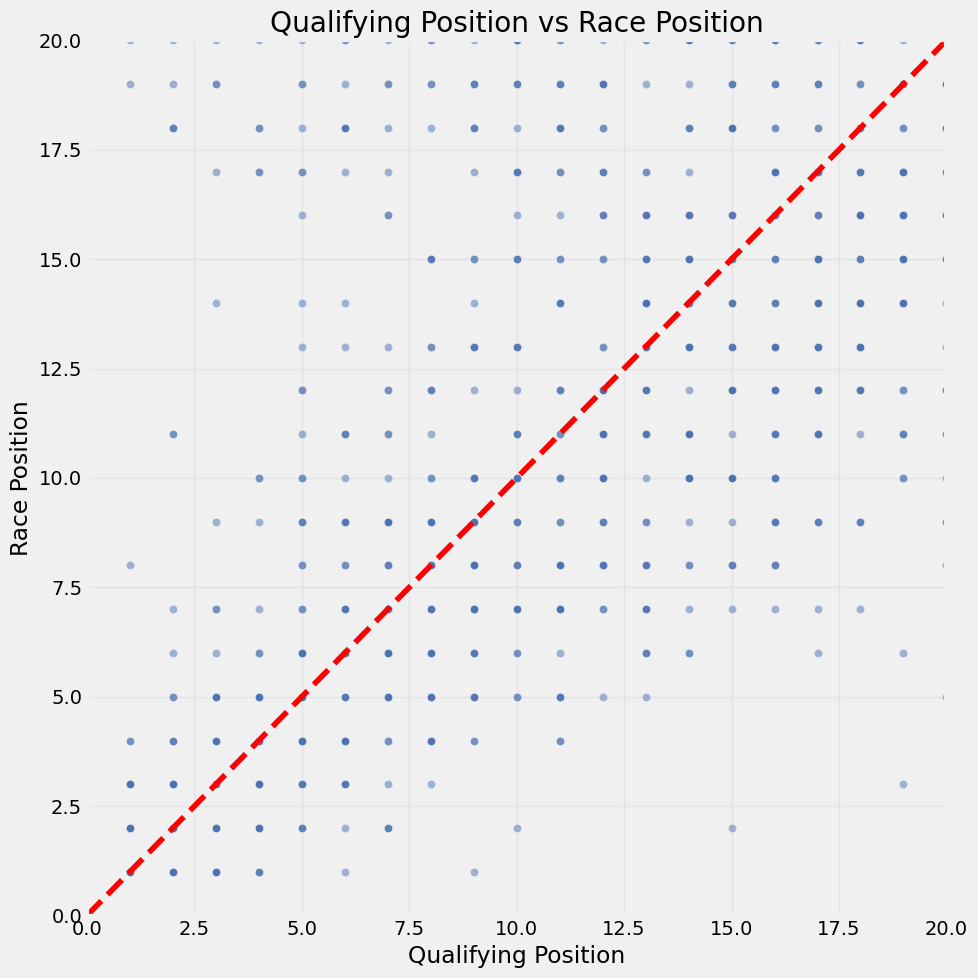

In [ ]:
# Merge qualifying and race results data
merged_data = pd.merge(
    qualifying_df[['season', 'race_name', 'driver_id', 'position']],
    race_results_df[['season', 'race_name', 'driver_id', 'position']],
    on=['season', 'race_name', 'driver_id'],
    suffixes=('_quali', '_race')
)

# Calculate correlation between qualifying and race position
correlation = merged_data['position_quali'].corr(merged_data['position_race'])
print(f"Correlation between qualifying and race position: {correlation:.4f}")

# Create a scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=merged_data, x='position_quali', y='position_race', alpha=0.5)
plt.title('Qualifying Position vs Race Position')
plt.xlabel('Qualifying Position')
plt.ylabel('Race Position')
plt.plot([0, 20], [0, 20], 'r--')  # Diagonal line for reference
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Rendimiento de algunos pilotos

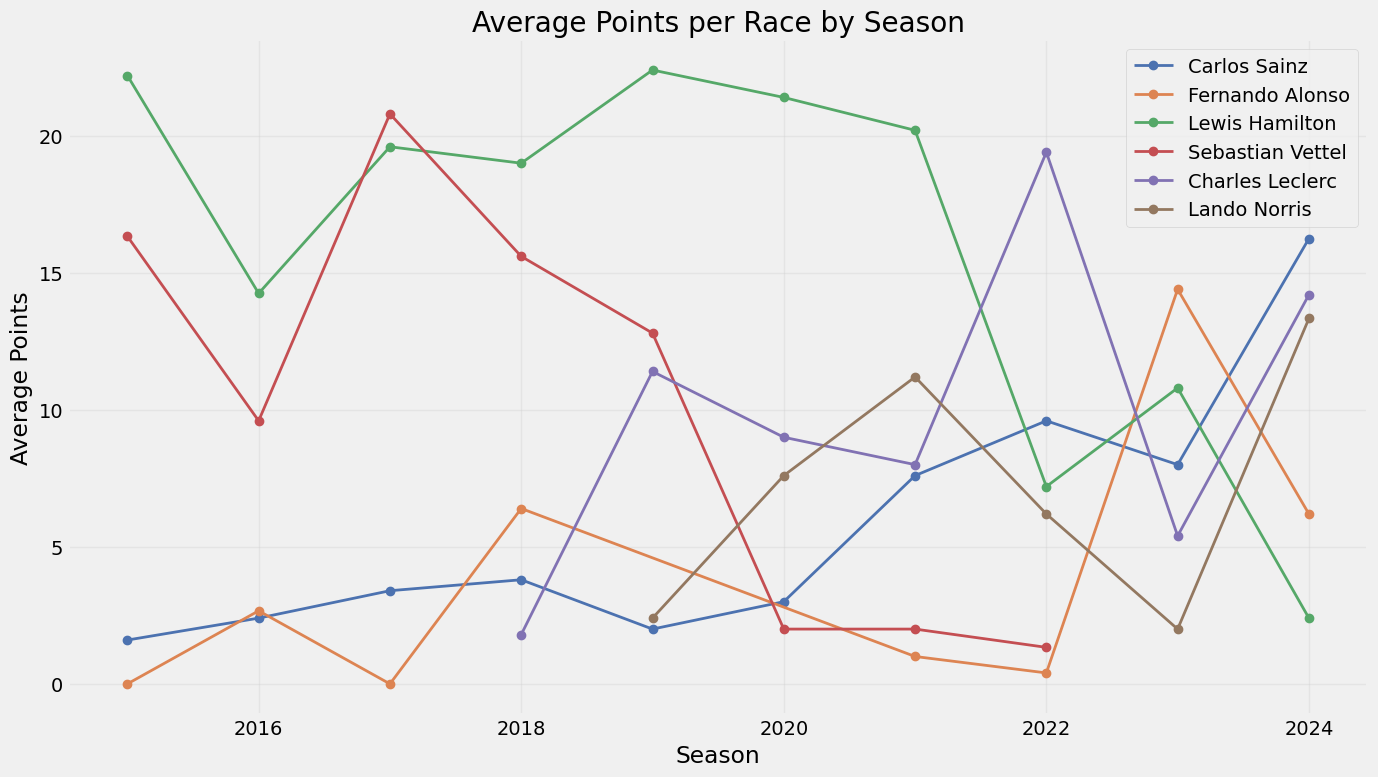

In [ ]:
# Select a few top drivers for analysis
selected_drivers = ['hamilton', 'verstappen', 'vettel', 'alonso', 'leclerc', 'sainz', 'norris']

# Filter data for these drivers
selected_driver_data = race_results_df[race_results_df['driver_id'].isin(selected_drivers)]

# Calculate average points per race by season for each driver
driver_season_avg = selected_driver_data.groupby(['season', 'driver'])['points'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(14, 8))
for driver in driver_season_avg['driver'].unique():
    driver_data = driver_season_avg[driver_season_avg['driver'] == driver]
    plt.plot(driver_data['season'], driver_data['points'], marker='o', linewidth=2, label=driver)

plt.title('Average Points per Race by Season')
plt.xlabel('Season')
plt.ylabel('Average Points')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Conclusiones

In [ ]:
# Summary statistics for the dataset
print("Summary Statistics:")
print(f"Total Seasons Analyzed: {race_results_df['season'].nunique()}")
print(f"Total Races: {race_results_df['race_name'].count() / 20}")  # Approximate by dividing by avg grid size
print(f"Total Drivers: {race_results_df['driver'].nunique()}")
print(f"Total Constructors: {race_results_df['constructor'].nunique()}")

Summary Statistics:
Total Seasons Analyzed: 10
Total Races: 50.0
Total Drivers: 46
Total Constructors: 18
